In [1]:
# Download The Dataset from 
#https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
## size of images required

IMAGE_SIZE = [224, 224]

In [7]:
## load the test and training sets

train_set = 'malaria\train'
test_set = 'malaria\test'

In [8]:
## preprocessing layer for VGG

vgg = VGG19(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

80142336/80134624 [==============================] - 180s 2us/step


In [10]:
## donot train vgg layers

for layer in vgg.layers:
    layer.trainable = False


In [17]:
## get number of folder in dataset

#folders = glob('malaria\train\*')
# print(folders)

[]


In [34]:
x = Flatten()(vgg.output)

prediction = Dense(2, activation = 'softmax')(x)


In [35]:
model = Model(inputs=vgg.input, outputs = prediction)

In [36]:
model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.training.Model object at 0x00000210739F2F88>>

In [37]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam',
                 metrics = ['accuracy'])

In [38]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('malaria/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('malaria/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 24472 images belonging to 2 classes.
Found 3086 images belonging to 2 classes.


In [39]:
len(test_set)
len(training_set)

765

In [40]:
r = model.fit_generator(training_set, validation_data = test_set, epochs = 5,
              steps_per_epoch = 765,
              validation_steps = 97
        )

Epoch 1/5
765/765 [==============================] - 350s 457ms/step - loss: 0.4202 - accuracy: 0.8274 - val_loss: 0.2435 - val_accuracy: 0.8950
Epoch 2/5
765/765 [==============================] - 350s 458ms/step - loss: 0.2913 - accuracy: 0.8831 - val_loss: 0.2662 - val_accuracy: 0.8976
Epoch 3/5
765/765 [==============================] - 349s 457ms/step - loss: 0.2802 - accuracy: 0.8929 - val_loss: 0.5904 - val_accuracy: 0.8185
Epoch 4/5
765/765 [==============================] - 348s 455ms/step - loss: 0.2781 - accuracy: 0.8961 - val_loss: 0.2826 - val_accuracy: 0.9086
Epoch 5/5
765/765 [==============================] - 340s 444ms/step - loss: 0.2561 - accuracy: 0.9052 - val_loss: 0.1567 - val_accuracy: 0.9475


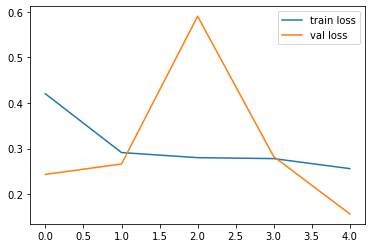

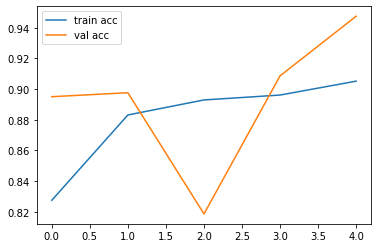

<Figure size 432x288 with 0 Axes>

In [42]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')